<a href="https://colab.research.google.com/github/Edugera/ENERGIA/blob/master/Correla%C3%A7%C3%A3oD%C3%B3larIBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto é uma aplicação do projeto de análise de ações com Python da série dos vídeos do [Código Quant](https://www.youtube.com/channel/UCzCrdOO2GLYVnNhZUvG03lg), iremos calcular a correlação entre ativos que neste exemplo será Dólar e IBOV.


Importaremos as bibliotecas padrões:

In [3]:
# Import e instale as biliotecas padrões
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns


Vamos definir as variáveis que iremos trabalhar e obter os dados:

In [8]:
# Crie a lista dos ativos
tickers = ["^BVSP", "USDBRL=X"]

# Defina a variável usando a lista criada e obtenha os dados da internet a partir de 01-01-2007
carteira = web.get_data_yahoo(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


Assim que baixamos e plotamos os dados, identificamos que há dados faltantes, por isso foi definido dados depois de 2007 acima e foi acrescentado uma linha de código para remover os códigos faltantes.

In [10]:
# Remova os dados faltantes
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2020-09-24,5.5924,97012.000000
2020-09-25,5.5084,96999.000000
2020-09-28,5.5611,94666.000000


In [23]:
# Ver como ficou a carteira
carteira

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2020-09-24,5.5924,97012.000000,17347.113711
2020-09-25,5.5084,96999.000000,17609.287751
2020-09-28,5.5611,94666.000000,17022.891136


In [12]:
# melhore a aprensentação do nome das variáveis
carteira.columns = ["DOLAR","IBOV"]

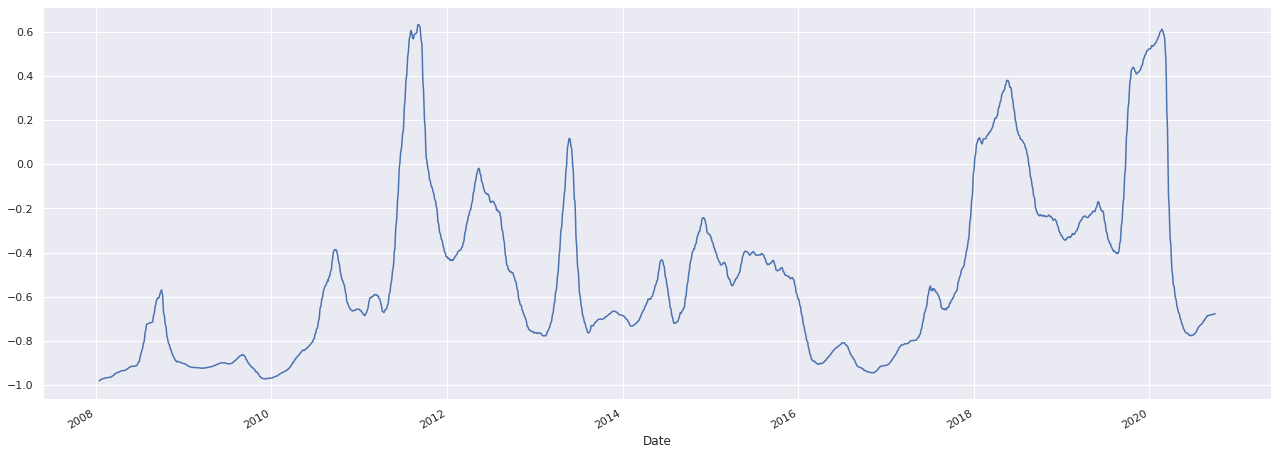

In [22]:
# Observe a correlação dos ativos
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [19]:
# Crie nova Janela de Observação
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"]/carteira["DOLAR"])
carteira

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2020-09-24,5.5924,97012.000000,17347.113711
2020-09-25,5.5084,96999.000000,17609.287751
2020-09-28,5.5611,94666.000000,17022.891136


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce1e235358>,
      dtype=object)

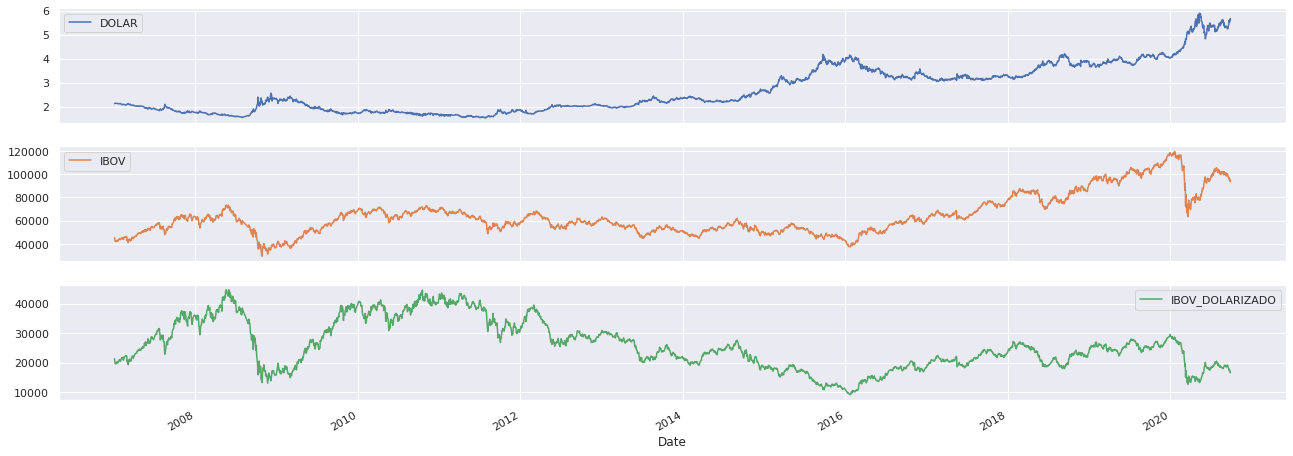

In [20]:
# Visualilze os Resultados
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

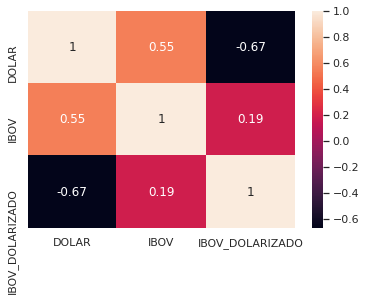

In [21]:
# Faça o mapa de correlação
sns.heatmap(carteira.corr(), annot=True)